## Corso di Tecniche di rappresentazione e modellizzazione dati : Compito d'esame- Veronica Bindi 15 dicembre 2025
# "Analisi dei Dati sui Contagi COVID-19" : 


# Obiettivo dell'esercizio: 
L’obiettivo di questo esercizio è analizzare i dati relativi alla pandemia di Covid-19 forniti dalla Protezione Civile. A tal fine è stato utilizzato il linguaggio Python insieme ad alcune delle sue principali librerie per l’elaborazione e la visualizzazione dei dati.
Per rendere l’analisi più mirata e approfondita, si è scelto di concentrarsi esclusivamente sui dati riferiti alla regione Friuli-Venezia Giulia.

# Indice
**Analisi Dati e grafici :**

**1. Parte 1 - Analisi dell'Andamento dei Nuovi Contagi**
    
    1.1 Osservazioni inerenti il grafico

**2. Parte 2 - Implementazione dei Modelli Epidemiologici**

    2.1 Andamento delle curve al variare del parametro k

    2.2 Andamento delle curve al variare del parametro t_0
    
    2.3 Andamento delle curve al variare del parametro N_{tot}

**3. Parte 3 - Analisi della Prima Ondata**
   
    3.1 Introduzione teorica - Statistica Bayesiana e Algoritmo emcee

    3.2 Analisi dei dati registrati nei primi 35 giorni di pandemia

    3.3 Analisi dell'andamento dei nuovi contagi per i primi 100 giorni di pandemia

    3.4 Propagazione dell'incertezza teorica per i modelli (35 giorni)

    3.5 Andamento cumulativo dei nuovi contagi registrati nei primi 35 giorni

    3.6 Propagazione dell'incertezza teorica per i modelli (100 giorni)

    3.7 Andamento cumulativo dei nuovi contagi registrati nei primi 100 giorni

    3.8 Osservazioni

**4. Parte 4 - Modellizzazione dell'Intervallo 3 Giugno 2020 - 3 Giugno 2021**

**5. Appendice**

**6. Conclusioni** 
   
   
   

# Analisi Dati e Grafici :

## Parte 1 - Analisi dell'Andamento dei Nuovi Contagi

Riporto la consegna legata a questa parte di esercizio :
1. Scaricare il dataset dei contagi COVID-19 dal repository della Protezione Civile. 
2. Graficare l'andamento dei nuovi contagi giornalieri (flag 'nuovi_positivi') per la 
regione prestabilita.

 Per prima cosa ho importato le librerie Python necessarie per svolgere l'analisi dati e per la creazione dei grafici : 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import emcee
from scipy.optimize import minimize
from scipy.stats import poisson
import pygtc
%matplotlib inline

Dopo aver scaricato il file dati della Protezione Civile sono andata a selezionare i dati di mio interesse, in modo tale da poter graficare l'andamento dei nuovi contagi giornalieri in funzione della data in cui sono stati registrati. 

In [3]:
data = pd.read_csv('covid.csv',index_col='data',parse_dates=True)
#tolgo alcune colonne non necessarie per l'analisi dati
data.drop(['stato','codice_regione','lat','long','note','note_test','note_casi'],axis=1,inplace=True) 
dataregione=data[data['denominazione_regione']=='Friuli Venezia Giulia'] # seleziono le righe del file dati associate alla regione FVG
dataregione_nuovipositivi= dataregione['nuovi_positivi'].astype(float).to_numpy() # conversione da stringa a numero float 

In [4]:
print(dataregione)

                     denominazione_regione  ricoverati_con_sintomi  \
data                                                                 
2020-02-24 18:00:00  Friuli Venezia Giulia                       0   
2020-02-25 18:00:00  Friuli Venezia Giulia                       0   
2020-02-26 18:00:00  Friuli Venezia Giulia                       0   
2020-02-27 18:00:00  Friuli Venezia Giulia                       0   
2020-02-28 18:00:00  Friuli Venezia Giulia                       0   
...                                    ...                     ...   
2024-10-12 17:00:00  Friuli Venezia Giulia                      91   
2024-10-13 17:00:00  Friuli Venezia Giulia                      95   
2024-10-14 17:00:00  Friuli Venezia Giulia                     100   
2024-10-15 17:00:00  Friuli Venezia Giulia                     103   
2024-10-16 17:00:00  Friuli Venezia Giulia                      98   

                     terapia_intensiva  totale_ospedalizzati  \
data                     

Segue una breve descrizione dei principali comandi utilizzati nelle celle soprastanti: 
* data = pd.read_csv('covid.csv',index_col='data',parse_dates=True) : dopo aver caricato il file con i dati, questo comando permette di leggerlo, di impostare la colonna data come indice del DataFrame e di convertire automaticamente le date nel formato datetime di Pandas. 
* Sono state rimosse alcune colonne ritenute non rilevanti ai fini dell’analisi, così da rendere il DataFrame più leggibile e focalizzato sui dati effettivamente utili. (Se ne potrebbero rimuovere anche delle altre, io ne ho scelte alcune, soprattutto tra quelle iniziali)
* Sono state selezionate soltanto le righe relative alla regione Friuli-Venezia Giulia, in quanto rappresenta l’area geografica oggetto dell’analisi.
*  Infine, i valori contenuti nella colonna "nuovi_positivi" sono stati convertiti da stringhe a float: infatti, inizialmente venivano interpretati come stringhe, impedendo la corretta generazione del grafico richiesto.

Concludo la prima parte di questo esercizio andando a graficare l'andamento dei nuovi contagi giornalieri in funzione della data in cui sono stati registrati : 

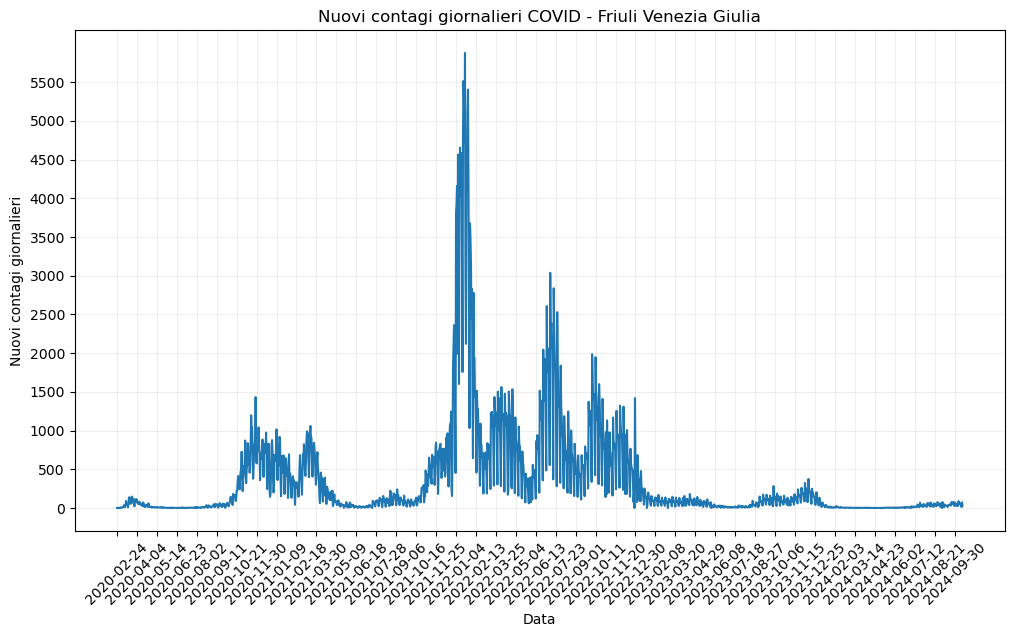

In [5]:
step=40 # indica ogni quanti giorni vado a selezionare una data da mettere come etichetta sull'asse x
step_y=500 # indica ogni quanto seleziono i valori da mettere come etichetta sull'asse y
plt.figure(figsize=(12,6.5)) # definisco le dimensioni del grafico 
plt.plot(dataregione.index, dataregione_nuovipositivi,linestyle='-') 
plt.title("Nuovi contagi giornalieri COVID - Friuli Venezia Giulia")
plt.xlabel("Data")
plt.ylabel("Nuovi contagi giornalieri")
plt.xticks(dataregione.index[::step],rotation=45) # ruota le date per una migliore leggibilità e mette i valori degli indici solo ogni 40 giorni
plt.yticks(np.arange(0, dataregione_nuovipositivi.max(), step_y))
plt.grid(True, alpha=0.2)
plt.show()


# Osservazioni inerenti il grafico : 
Osservando il grafico soprastante si può notare la presenza di alcuni picchi. Questi picchi si trovano in corrispondenza dei periodi in cui si sono verificate quelle che sono definite "ondate epidemiche" , ovvero quando il numero di contagi è particolarmente elevato. In particolare, si può notare che i picchi più alti sono concentrati soprattutto in prossimità dell'anno 2022.   

## Parte 2 - Implementazione dei Modelli Epidemiologici

Come si evince dal titolo, questa sezione è dedicata all'implementazione di due modelli matematici comunemente utilizzati nell'ambito dell'analisi epidemiologica: 
* Funzione Logistica : $N(<t)=\frac{N_{tot}}{1+e^{-k(t-t_0)}}$


* Funzione di Gompertz : $N(<t)=N_{tot}e^{-ln(N_{tot})e^{-k(t-t_0)}}$

In entrambi i modelli :
* $N_{tot}$ rappresenta il numero totale di contagi previsti a fine ondata epidemica
*  k è la velocità di propagazione del contagio
*  $t_0$ corrisponde al tempo associato all'inizio dell'epidemia e perciò, al giorno del contagio del paziente zero. 


Riporto consegna associata alla seconda parte dell'esercizio : 

Scrivere delle funzioni in Python per implementare: 
* La funzione logistica 
* La funzione di Gompertz 
* I nuovi contagi giornalieri predetti dalle due funzioni (la differenza dei contagi predetti 
tra il giorno $i+1$ ed il giorno $i$). 
* Utilizzare queste funzioni per modellare l'andamento dei nuovi contagi, analizzando 
come i contagi cambiano al variare dei parametri di queste funzioni.

In [6]:
# funzione Logistica : 
def logistica(t,N_tot,k,t_0) : 
    """ Modello con funzione logistica """
    return N_tot / (1 + np.exp(-k * (t - t_0)))

# funzione di Gompertz :
def gompertz(t,N_tot,k,t_0) :
    """Modello con funzione di Gompertz """
    return N_tot * np.exp(-np.log(N_tot) * np.exp(-k * (t - t_0)))  
#in entrambi i casi i parametri sono N_tot,t,t_0,k

# funzione per implementare i nuovi contagi giornalieri predetti dai due modelli considerati :
def contagi_giornalieri_log(i, N_tot, k, t_0) :
    """ Restituisce i nuovi contagi predetti dalla funzione Logistica """
    return logistica(i + 1, N_tot, k, t_0) - logistica(i, N_tot, k, t_0)

def contagi_giornalieri_gomp(i, N_tot, k, t_0) :
    """ Restutuisce i nuovi contagi giornalieri predetti dalla funzione di Gompertz"""
    return gompertz(i + 1, N_tot, k, t_0) - gompertz(i, N_tot, k, t_0)


Scegliendo dei valori arbitrari per i parametri delle due funzioni considerate, si può generare un grafico che che mostri l’andamento dei nuovi contagi giornalieri durante un certo intervallo di giorni. In questo modo si ottiene una prima visualizzazione qualitativa della dinamica dell'epidemia prevista dai due modelli.

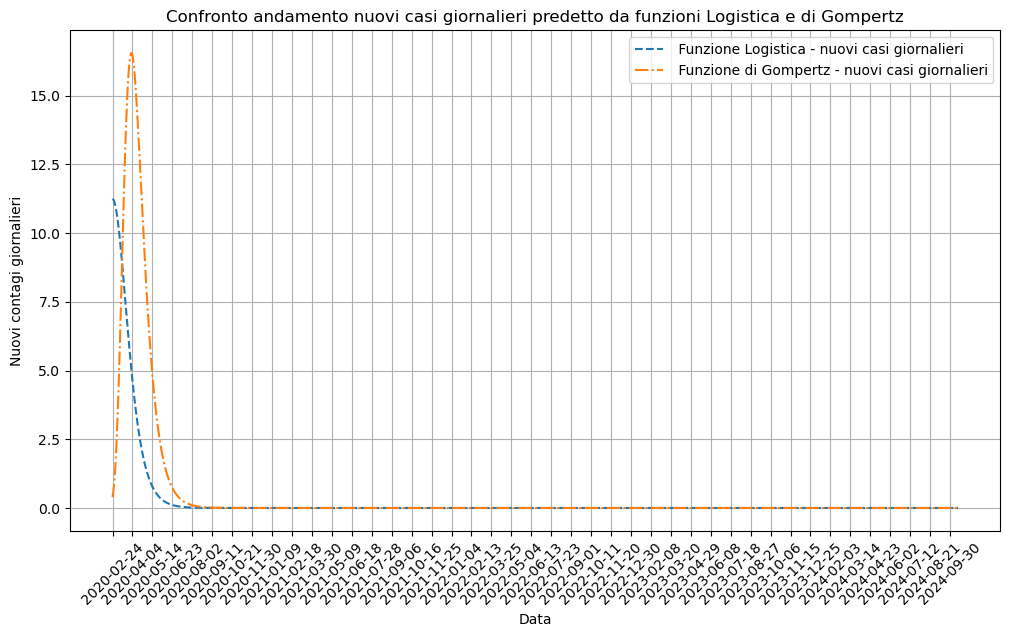

In [7]:
# imposto dei valori arbitrari per i parametri delle due funzioni : 
t_0=0
N_tot= 900    
k=0.05 

durata=np.arange(len(dataregione)) #creo un array della stessa lunghezza del file dati 
log_casi=[contagi_giornalieri_log(i,N_tot,k,t_0) for i in durata]
gomp_casi=[contagi_giornalieri_gomp(i,N_tot,k,t_0) for i in durata]

# creo il grafico dove confronto l'andamento dei nuovi contagi previsto dalle due funzioni considerate : 
step=40
plt.figure(figsize=(12,6.5))
plt.plot(dataregione.index, log_casi, label=" Funzione Logistica - nuovi casi giornalieri", linestyle='--') #curva per funzione Logistica 
plt.plot(dataregione.index, gomp_casi, label=" Funzione di Gompertz - nuovi casi giornalieri", linestyle='-.' ) #curva per funzione di Gompertz
plt.title("Confronto andamento nuovi casi giornalieri predetto da funzioni Logistica e di Gompertz")
plt.xlabel("Data")
plt.ylabel("Nuovi contagi giornalieri")
plt.legend()
plt.xticks(dataregione.index[::step],rotation=45)
plt.grid(True)
plt.show()



Per questa prima prova ho scelto di impostare valori relativamente bassi dei parametri, così da osservare più facilmente come varia l’andamento delle due curve quando tali parametri vengono successivamente aumentati. Ciò permette di confrontare il comportamento dei modelli in condizioni diverse e di comprenderne meglio la sensibilità ai parametri.

# Andamento delle curve al variare del parametro k :

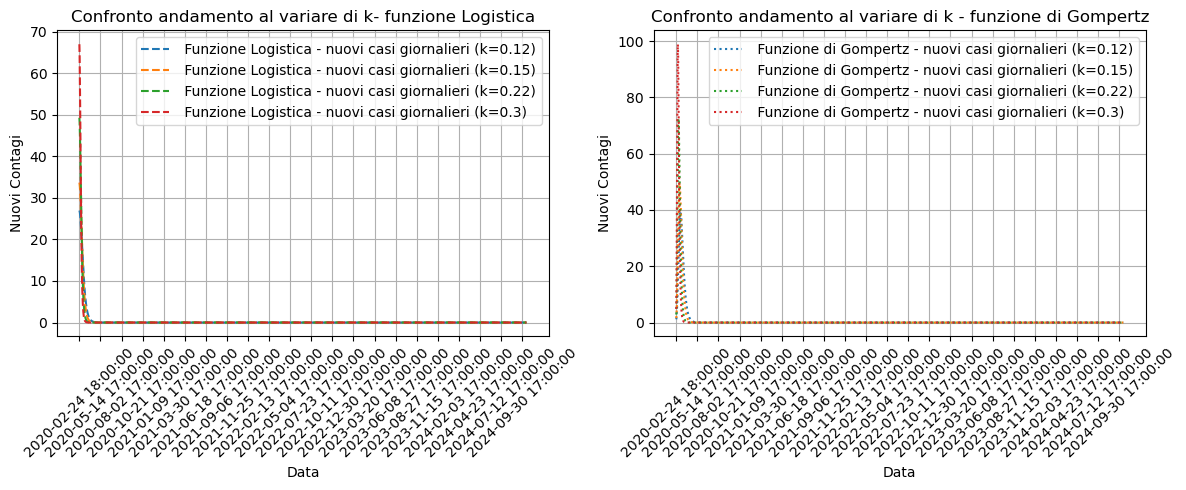

In [8]:
# variazione del valore di k :
k_values=[0.12,0.15,0.22, 0.30] #lista con alcuni possibili valori di k 
#gli altri parametri rimangono invariati
t_0=0
N_tot=900 

# grafici :
durata=np.arange(len(dataregione)) #creo un array della stessa lunghezza del file dati 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) #creo una figura con 1 riga e due colonne 

# Grafico per funzione Logistica:
step=80
for k in k_values :
    log_casi=[contagi_giornalieri_log(i,N_tot,k,t_0) for i in durata]
    ax1.plot(dataregione.index,log_casi,label= f" Funzione Logistica - nuovi casi giornalieri (k={k})" , linestyle='--' )
   
ax1.set_title("Confronto andamento al variare di k- funzione Logistica")
ax1.set_xlabel("Data")
ax1.set_ylabel("Nuovi Contagi")
ax1.legend()
ax1.set_xticks(dataregione.index[::step])
ax1.set_xticklabels(dataregione.index[::step], rotation=45)
ax1.grid(True)

# Grafico per funzione di Gompertz :
step=80
for k in k_values :
    gomp_casi=[contagi_giornalieri_gomp(i,N_tot,k,t_0) for i in durata]
    ax2.plot(dataregione.index,gomp_casi, label= f" Funzione di Gompertz - nuovi casi giornalieri (k={k})", linestyle=':' )
    
ax2.set_title("Confronto andamento al variare di k - funzione di Gompertz")
ax2.set_xlabel("Data")
ax2.set_ylabel("Nuovi Contagi")
ax2.legend()
ax2.set_xticks(dataregione.index[::step])
ax2.set_xticklabels(dataregione.index[::step], rotation=45)
ax2.grid(True)

plt.tight_layout()  # per evitare la sovrapposizione dei grafici sulla stessa riga
plt.show()


# Osservazioni : 
Osservando i due grafici soprastanti si può notare come all'aumentare di k:
* Funzione Logistica : a parità dei valori di $N_{tot}$ e di $t_0$ , all'aumentare di k si vede come le curve diventano sempre più ripide e la loro curvatura tende, di volta in volta, sempre più verso l'asse y e in particolare verso $t_0$ (qui pari a zero).
* Funzione di Gompertz : sempre a parità di $N_{tot}$ e di $t_0$ , si può notare come all'aumentare di k si presenti un andamento analogo a quello osservato per la funzione Logistica. Infatti, anche in questo caso, le curve con un k maggiore hanno una maggior ripidità rispetto a quelle con valori di k minori.


# Andamento delle curve al variare del parametro $t_0$ :

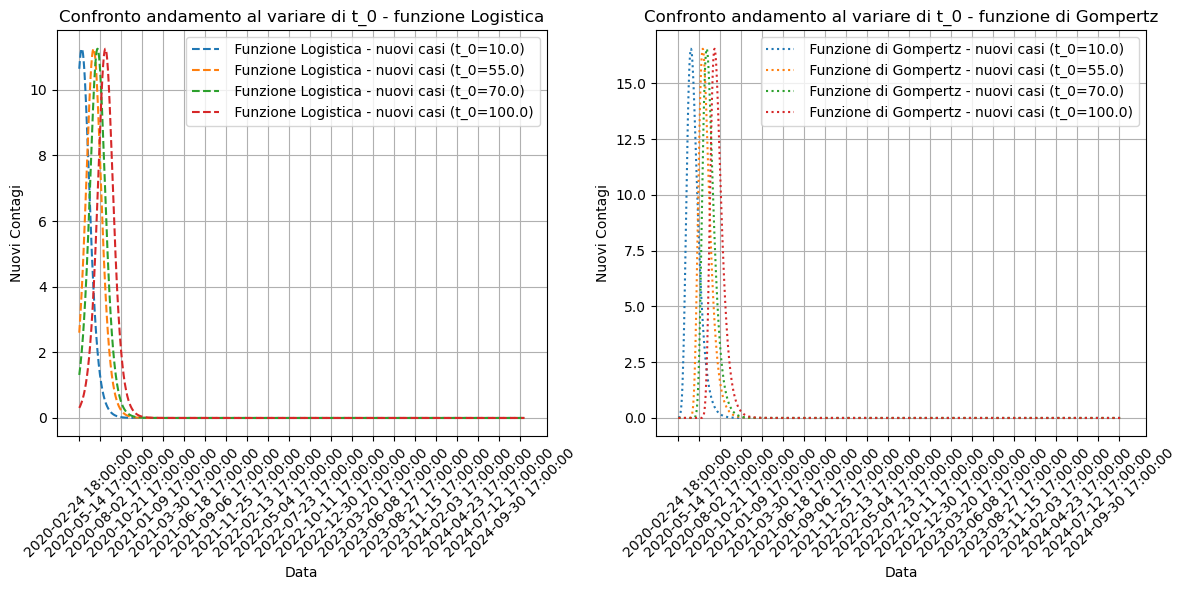

In [9]:
#variazione del valore di t_0 :
t_0_values=[10.0,55.0,70.0,100.0] #creo una lista con diversi valori di t_0

#gli altri parametri rimangono invariati
N_tot=900
k=0.05

# grafici :
durata=np.arange(len(dataregione)) #creo un array della stessa lunghezza del file dati 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) #creo una figura con 1 riga e due colonne 

# Grafico per funzione Logistica:
step=80
for t_0 in t_0_values :
    log_casi=[contagi_giornalieri_log(i,N_tot,k,t_0) for i in durata]
    ax1.plot(dataregione.index,log_casi,label= f" Funzione Logistica - nuovi casi (t_0={t_0})" , linestyle='--' )
   
ax1.set_title("Confronto andamento al variare di t_0 - funzione Logistica")
ax1.set_xlabel("Data")
ax1.set_ylabel("Nuovi Contagi")
ax1.legend()
ax1.set_xticks(dataregione.index[::step])
ax1.set_xticklabels(dataregione.index[::step], rotation=45)
ax1.grid(True)

# Grafico per funzione di Gompertz :
step=80
for t_0 in t_0_values :
    gomp_casi=[contagi_giornalieri_gomp(i,N_tot,k,t_0) for i in durata]
    ax2.plot(dataregione.index,gomp_casi, label= f" Funzione di Gompertz - nuovi casi (t_0={t_0})", linestyle=':' )
    
ax2.set_title("Confronto andamento al variare di t_0 - funzione di Gompertz")
ax2.set_xlabel("Data")
ax2.set_ylabel("Nuovi Contagi")
ax2.legend()
ax2.set_xticks(dataregione.index[::step])
ax2.set_xticklabels(dataregione.index[::step], rotation=45)
ax2.grid(True)

plt.tight_layout()  
plt.show()




# Osservazioni : 
In entrambi i grafici si può notare come, a parità dei valori di $N_{tot}$ e di k , una variazione del valore di $t_0$ comporta una traslazione delle curve lungo l'asse x , che è proprio l'asse dei tempi. 

# Andamento delle curve al variare del parametro $N_{tot}$ : 

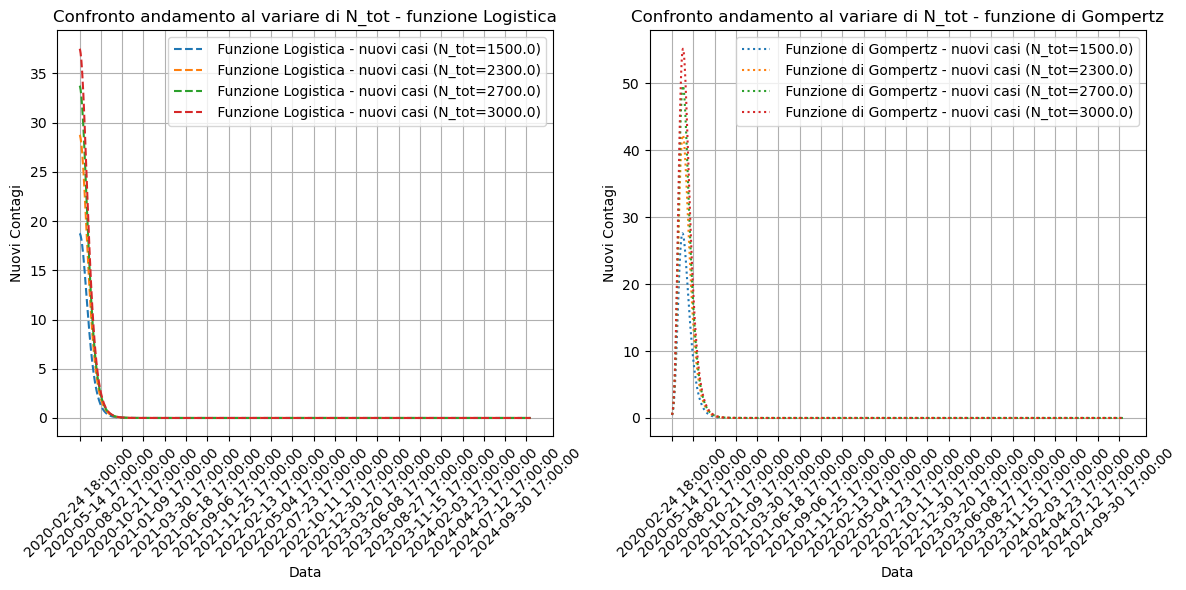

In [10]:
#variazione di N_tot : 
N_tot_values=[1500.,2300.,2700.,3000.] #creo una lista con diversi valori di N_tot 
#gli altri parametri rimangono invariati :
k=0.05
t_0=0

# grafici :
durata=np.arange(len(dataregione)) #creo un array della stessa lunghezza del file dati 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) #creo una figura con 1 riga e due colonne 

# Grafico per funzione Logistica:
step=80
for N_tot in N_tot_values :
    log_casi=[contagi_giornalieri_log(i,N_tot,k,t_0) for i in durata]
    ax1.plot(dataregione.index,log_casi,label= f" Funzione Logistica - nuovi casi (N_tot={N_tot})" , linestyle='--' )
   
ax1.set_title("Confronto andamento al variare di N_tot - funzione Logistica")
ax1.set_xlabel("Data")
ax1.set_ylabel("Nuovi Contagi")
ax1.legend()
ax1.set_xticks(dataregione.index[::step])
ax1.set_xticklabels(dataregione.index[::step], rotation=45)
ax1.grid(True)

# Grafico per funzione di Gompertz :
step=80
for N_tot in N_tot_values :
    gomp_casi=[contagi_giornalieri_gomp(i,N_tot,k,t_0) for i in durata]
    ax2.plot(dataregione.index,gomp_casi, label= f" Funzione di Gompertz - nuovi casi (N_tot={N_tot})", linestyle=':' )
    
ax2.set_title("Confronto andamento al variare di N_tot - funzione di Gompertz")
ax2.set_xlabel("Data")
ax2.set_ylabel("Nuovi Contagi")
ax2.legend()
ax2.set_xticks(dataregione.index[::step])
ax2.set_xticklabels(dataregione.index[::step], rotation=45)
ax2.grid(True)

plt.tight_layout()  
plt.show()


# Osservazioni : 
Dall'osservazione dei grafici si può notare che, per entrambi i modelli, a parità del valore degli altri due parametri presenti, un aumento del numero totale dei contagi comporta un aumento dell'altezza massima delle curve, ma non ne varia la forma complessiva. Conseguentemente, caratteristiche come l'inclinazione, la velocità di crescita e quanto una curva è allungata o schiacciata lungo l'asse dei tempi, dipendono solamente dai parametri k e $t_0$.

## Parte 3 - Analisi della Prima Ondata

Riporto la consegna associata a questa parte dell'esercizio : 
1. Concentrarsi sull'andamento dei contagi nella regione prestabilita durante i primi 35 
giorni dalla comparsa dei primi casi (30 marzo 2020). 
2. Supporre che i nuovi contagi giornalieri siano una realizzazione poissoniana con un 
valore di aspettazione dato dalla funzione logistica (e di Gompertz). 
3. Scrivere una funzione per la likelihood poissoniana e utilizzarla per vincolare i valori 
dei parametri del modello. 
4. Confrontare le previsioni del modello con i dati effettivi, propagando l'incertezza 
teorica associata al modello. Analizzare come la predizione fatta dopo i primi 35 
giorni possa corrispondere all'andamento osservato nei primi 100 giorni (sia 
giornaliero sia cumulativo). 
5. Commentare i risultati e i limiti dell’analisi 

Innanzitutto vado a selezionare i dati appartenenti all'intervallo temporale scelto (24/02/2020-30/03/2020)

In [11]:
dataregione.index = pd.to_datetime(dataregione.index) #in questo modo mi assicuro che l'indice sia in formato datetime 
# (altrimenti era come se stessi confrontando una data Python (tipo Timestamp) con una stringa (tipo "2020-03-30"))

# definisco e seleziono la data di inizio :
data_inizio=pd.to_datetime("2020-02-24")
#definisco e seleziono la data finale : 
data_fine=pd.to_datetime("2020-03-30") 
#per selezionare la data finale si può anche usare : data_fine = data_inizio + pd.Timedelta(days=35)

#vado a leggere i dati dei nuovi contagi in questo intervallo temporale, concentrandomi sempre su quelli registrati per la regione FVG:
dataregione_35 = dataregione.loc[data_inizio:data_fine].copy() #.copy() è una misura di sicurezza perché crea una copia indipendente del sotto-DataFrame  
dataregione_35['Giorno'] = (dataregione_35.index - data_inizio).days  # calcolo il numero di giorni trascorsi tra la data di ogni riga (appartenente all'intervallo 
#di tempo pari a 35 giorni) e una data di riferimento, data_inizio e creo una nuova colonna 'Giorni' dove scrivo tale differenza come numero intero

 


# Introduzione teorica - Statistica Bayesiana e Algoritmo emcee : 


La statistica bayesiana, insieme alla statistica frequentista sono due diversi approcci presenti in statistica. Nell'approccio frequentista si parte da un modello e si formulano ipotesi che vengono verificate attraverso la ripetizione dell’esperimento un numero sufficientemente elevato di volte. I parametri del modello sono considerati valori fissi ma sconosciuti, e l’obiettivo è proprio quello di stimarli. L'approccio bayesiano, che è quello adottato in questa analisi, invece, si fonda sull’idea che i parametri del modello siano variabili aleatorie descritte da una distribuzione di probabilità. I dati osservati sono considerati fissi, e lo scopo è valutare quanto bene il modello sia in grado di descriverli. Inoltre, la statistica bayesiana dipende sia dal prior, che dalla Likelihood, mentre quella frequentista dipende solo dalla Likelihood. Per definire cosa siano il prior e la Likelihood si può prendere la relazione formalizzata dal **Teorema di Bayes** e scriverla in funzione dei parametri p di un modello M e dei dati ottenendo : 
$$
P(p|d M) = \frac{P(d|p M) \cdot P(p|M)}{P(d|M)}
$$
Posso ora definire il **prior** come **$P(p|M)$**, ovvero l’insieme delle informazioni disponibili sui parametri prima dell'osservazione dei dati e la **Likelihhod** come **$P(d|p M)$**. La Likelihood o Verosimiglianza può essere interpretata come quella serie di informazioni che acquisisco sui parametri dai dati. Conseguentemente la Likelihood permette di aggiornare la conoscenza iniziale sui parametri, quindi il prior, ottenendo la **posterior**, **$P(p|d M)$**. 

In questo esercizio si ricorre alla statistica bayesiana per stimare i parametri della funzione Logistica e di Gompertz. In particolare, nell'ambito del campionamento Markov Chain Monte Carlo, MCMC (una tecnica che permette di approssimare la distribuzione a posteriori dei parametri esplorando lo spazio dei parametri tramite catene di Markov), vado a sfruttare l'algoritmo emcee, prendendo come funzione per la Likelihood la distribuzione di Poisson, come richiesto dall'esercizio. Quindi ho che : 
$$
\mathcal{L}(\lambda|y)= \prod_{i=1}^{n} \frac{\lambda_i^{y_i}e^{-\lambda_i}}{y_i!}
$$

dove gli $y_i$ rappresentano i valori osservati, mentre i $\lambda_i$ rappresentano i valori attesi dal modello (funzione Logistica e di Gompertz) per il giorno i-esimo.  Generalmente, però, si tende a lavorare con il logaritmo della Likelihood, in quanto è più comodo da implementare. Nel caso della Likelihood scelta, si ha che la produttoria diventa una sommatoria, per quanto previsto dalle proprietà dei logaritmi e il termine con il fattoriale può essere trascurato, dato che non contiene il parametro $\lambda$ e perciò è costante. 

# Analisi dei dati registrati nei primi 35 giorni di pandemia : 

Per prima cosa vado a definire tre function: una per il prior, una per la Likelihood e una per la posterior :

In [12]:
# definisco il prior : 
def log_prior(theta) :  #scelgo un prior piatto, ovvero uguale a 1, che con il logaritmo diventa zero
    N_tot,k,t_0 = theta    # N_tot,k,t_0 sono i parametri delle funzioni Logistica e di Gompertz
    if k>=0 and -50<t_0<100 and 0<N_tot<1e6:
        return 0.0
    return -np.inf

# definisco il logaritmo della Likelihood per la funzione Logistica : 
def log_likelihood_log(theta,t_val,y_val):
    N_tot,k,t_0 = theta
    lamb_t_log= [contagi_giornalieri_log(t,N_tot,k,t_0) for t in t_val]
    lamb_t_log=np.maximum(lamb_t_log,1e-3) # dato che log(0)= -inf, voglio evitare che questo succeda, altrimenti si blocca l'algoritmo  
    return np.sum(y_val * np.log(lamb_t_log) - lamb_t_log)  # logaritmo della likelihood poissoniana 

# definisco il logaritmo della Likelihood per la funzione di Gompertz:
def log_likelihood_gomp(theta,t_val,y_val):
    N_tot,k,t_0 = theta
    lamb_t_gomp= [contagi_giornalieri_gomp(t,N_tot,k,t_0) for t in t_val]
    lamb_t_gomp=np.maximum(lamb_t_gomp,1e-3)   # dato che log(0)= -inf, voglio evitare che questo succeda, altrimenti si blocca l'algoritmo  
    return np.sum(y_val * np.log(lamb_t_gomp) - lamb_t_gomp)    # logaritmo della likelihood poissoniana 

# definisco la posterior per la funzione Logistica:
def log_posterior_log(theta,t_val,y_val):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_log(theta, t_val,y_val)

# definisco la posterior per la funzione di Gompertz : 
def log_posterior_gomp(theta,t_val,y_val):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood_gomp(theta, t_val,y_val)

#converto in array numPy
t_val=dataregione_35['Giorno'].values
y_val = dataregione_35['nuovi_positivi'].astype(float).values   

In [13]:
print(y_val)

[  0.   0.   0.   0.   0.   0.   6.   3.   4.   5.   3.  10.  11.  15.
  36.  23.  10.  41.  90.  44.  46.  39.   8.  68. 137.  57. 134.  84.
  56.  62. 147.  84.  94. 119.  44.]


In [14]:
np.random.seed(42)  #serve a rendere riproducibile la scelta del punto iniziale 
nll_log = lambda *args: -log_posterior_log(*args) 
nll_gomp = lambda *args: -log_posterior_gomp(*args)
initial=np.array([1000,0.1,5]) 
soln_log = minimize(nll_log, initial, args=(t_val,y_val))  #minimize cerca i parametri che minimizzano nll
soln_gomp =minimize(nll_gomp, initial, args=(t_val,y_val))

#soln contiene anche i valori ottimali dei due parametri, perciò procedo con l'estrarre tali valori:
# è .x che mi permette di prendere la miglior soluzione trovata

N_tot_bf_log, k_bf_log, t_0_bf_log = soln_log.x
N_tot_bf_gomp, k_bf_gomp, t_0_bf_gomp = soln_gomp.x 
print("Funzione Logistica:", soln_log.x)
print("Funzione di Gompertz:", soln_gomp.x)


C:\Users\veron\anaconda3\envs\laboratorioTdr\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


Funzione Logistica: [1.90503777e+03 2.08774300e-01 2.89592447e+01]
Funzione di Gompertz: [3.16622429e+03 7.81850320e-02 4.80243636e+00]


In [15]:
pos_log = soln_log.x *(1+ 1e-6 * np.random.randn(32, 3)) # sto creando 32 walkers 
nwalkers, ndim = pos_log.shape
pos_gomp = soln_gomp.x *(1+ 1e-6 * np.random.randn(32, 3))
nwalkers, ndim = pos_gomp.shape 

sampler_log = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_log, args = (t_val , y_val))
sampler_gomp = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_gomp, args=(t_val , y_val))

sampler_log.run_mcmc(pos_log, 3000, progress=True);  #3000 rappresenta la lunghezza della catena per i walkers
sampler_gomp.run_mcmc(pos_gomp, 3000, progress=True )

samples_log = sampler_log.get_chain(discard=100) 
samples_gomp = sampler_gomp.get_chain(discard=100)
#discard=100, tolgo i primi passi, ovvero il burn in. Con flat=True ottengo (n_steps * n_walkers, n_dim),invece di (n_steps, n_walkers, n_dim)

100%|██████████| 3000/3000 [00:55<00:00, 54.01it/s]


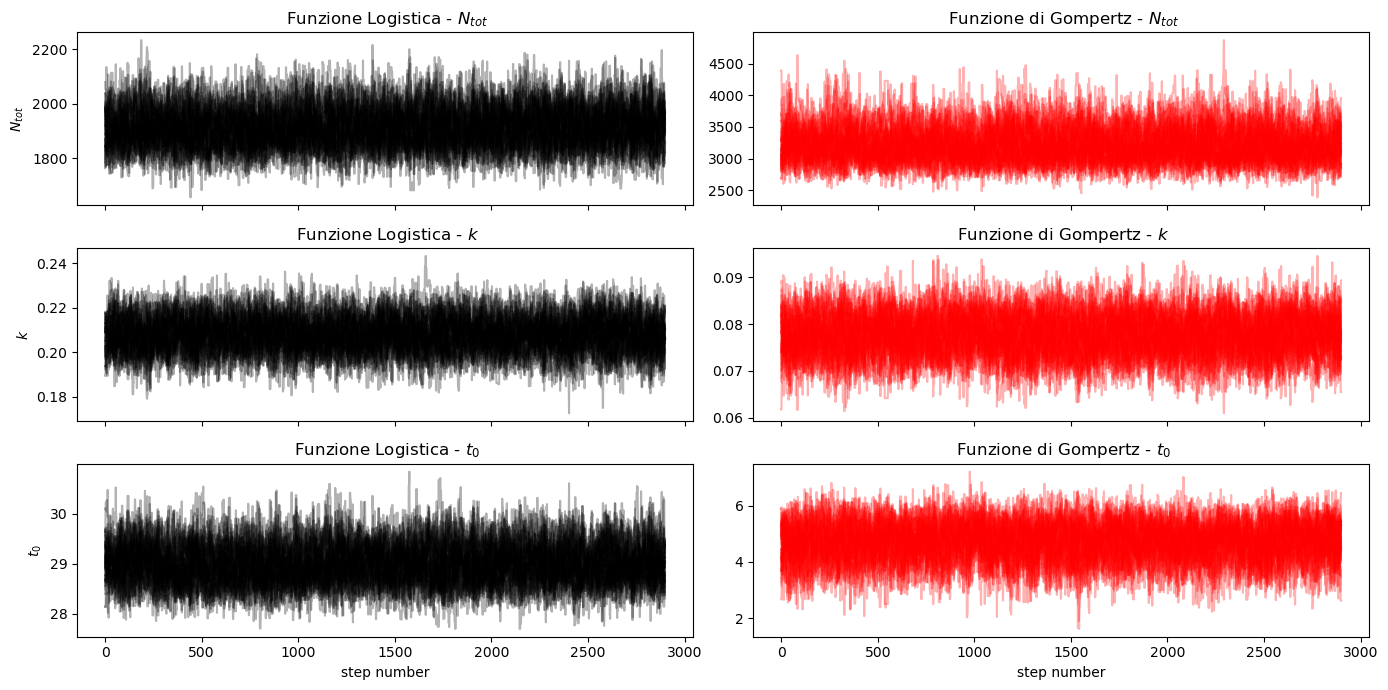

In [16]:
# vado a realizzare i trace plot per i due modelli : 
fig, axes = plt.subplots(3,2, figsize=(14, 7), sharex=True) #sharex: indica che i due grafici condividono asse x
labels = ["$N_{tot}$", "$k$", "$t_0$"]
for i in range(ndim):
    axes[i,0].plot(samples_log[:, :, i], 'k', alpha=0.3)
    axes[i,0].set_ylabel(labels[i])
    axes[i,0].set_title(f' Funzione Logistica - {labels[i]}')
    axes[i,1].plot(samples_gomp[:, :, i], 'r', alpha=0.3)
    axes[i,1].set_title(f' Funzione di Gompertz - {labels[i]}')

axes[-1,0].set_xlabel("step number");
axes[-1,1].set_xlabel("step number");
plt.tight_layout()
plt.show()


Per poter visualizzare in modo più completo la posterior si possono realizzare due grafici triangolari o corner plots, 
uno per ogni modello considerato. Da questi grafici si può osservare il tipo di correlazione presente tra i parametri e la distribuzione della posterior per ognuno di essi. Se ottengo un ellisse allungato in una certa direzione, allora i parametri variano insieme, quindi sono correlati. In particolare, se l'ellisse è orientatato, ponendolo in un sistema cartesiano, come la bisettrice del primo e del terzo quadrante, allora i parametri sono positivamente correlati, mentre nel caso in cui l'ellisse è orientato lungo la direzione dell'altra bisettrice, allora i parametri sono anticorrelati. A questo si aggiunge anche il fatto che è più probabile trovare il valore dei parametri nell'ellisse più interno (di colore blu scuro nel grafico e rappresenta $1\sigma$), piuttosto che nell'ellisse esterno (che, invece, rappresenta $2\sigma$).

In [17]:
# analizzo quanto velocemente la catena osserva lo spazio dei parametri:
tau_log = sampler_log.get_autocorr_time()
tau_gomp = sampler_gomp.get_autocorr_time()
print("Logistica:",tau_log)
print("Gompertz :" ,tau_gomp)

Logistica: [38.23215376 37.07342024 39.64189722]
Gompertz : [40.01629144 40.38145074 39.79444986]


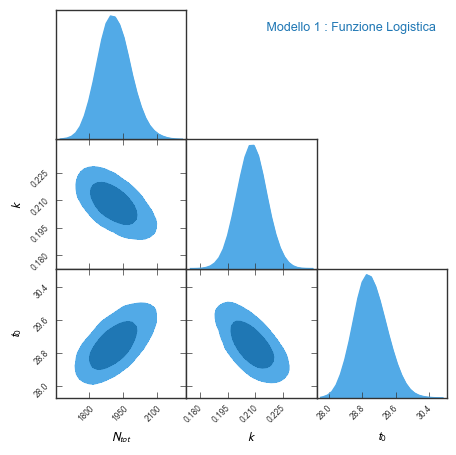

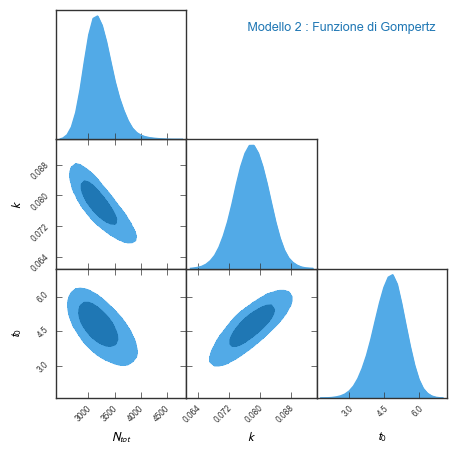

In [18]:
flat_samples_log = sampler_log.get_chain(discard=100, flat=True)
flat_samples_gomp = sampler_gomp.get_chain(discard=100, flat=True)

#corner plot per funzione Logistica :
GTC = pygtc.plotGTC(chains=flat_samples_log,          
                    paramNames=['$N_{tot}$','$k$','$t_0$'],
                    chainLabels=[' Modello 1 : Funzione Logistica'],
                    figureSize='MNRAS_page')

# corner plot per funzione di Gompers : 
GTC = pygtc.plotGTC(chains=flat_samples_gomp,          
                    paramNames=['$N_{tot}$','$k$','$t_0$'],
                    chainLabels=[' Modello 2 : Funzione di Gompertz'],
                    figureSize='MNRAS_page')
plt.show()

# Analisi dell'andamento dei nuovi contagi per i primi 100 giorni di pandemia : 

Considero i nuovi contagi giornalieri per i primi 100 giorni dal giorno zero : 

In [19]:
dataregione.index = pd.to_datetime(dataregione.index) 

# definisco e seleziono la data di inizio :
data_inizio=pd.to_datetime("2020-02-24")
#definisco e seleziono la data finale : 
data_fine = data_inizio + pd.Timedelta(days=100)

#vado a leggere i dati dei nuovi contagi in questo intervallo temporale, concentrandomi sempre su quelli registrati per la regione FVG:
dataregione_100 = dataregione.loc[data_inizio:data_fine].copy()  
dataregione_100['Giorno'] = (dataregione_100.index - data_inizio).days 

In [20]:
#converto in array numPy. Questi sono i dati estratti dal file dati :  
t_val_100=dataregione_100['Giorno'].values
y_val_100 = dataregione_100['nuovi_positivi'].astype(float).values  

# Propagazione dell'incertezza teorica per i modelli (35 giorni) :

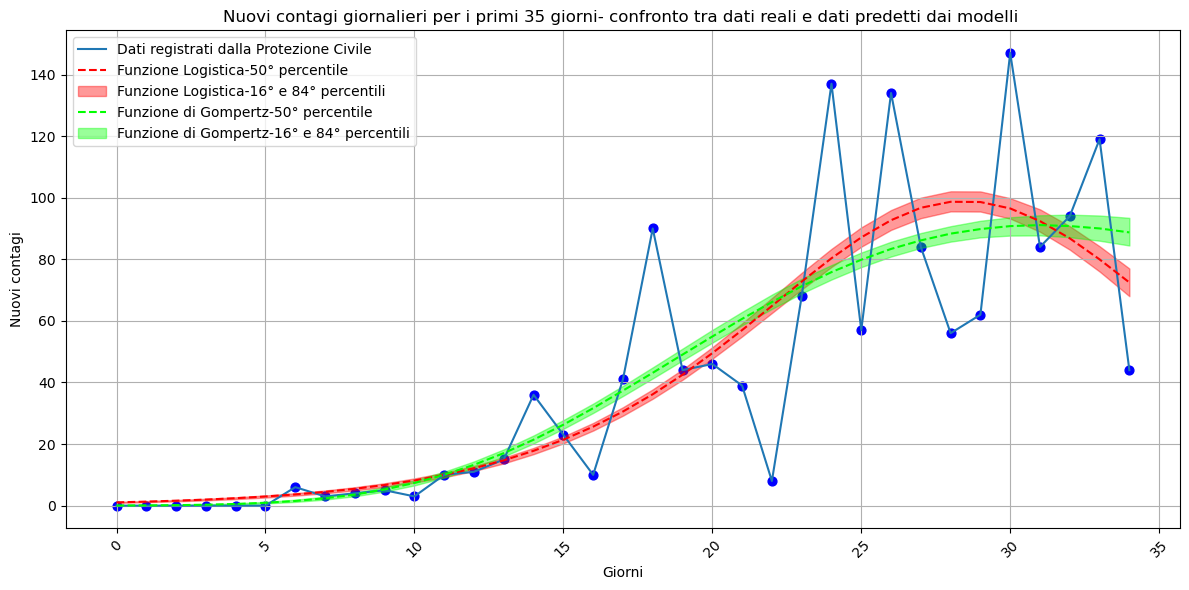

In [21]:
 
# funzione Logistica :
def previsione_mod_log(samples,giorni):
    prediction=[]
    for theta in samples[::100]:   #prendo un set di parametri prodotti da mcmc ogni 100
        N_tot, k, t_0 = theta
        y_pred=[contagi_giornalieri_log(t, N_tot, k, t_0) for t in giorni]
        prediction.append(y_pred)
    return np.array(prediction) #ottengo un array con tutte le curve della funzione logistica calcolate per i set di parametri selezionati 

# funzione di Gompertz : 
def previsione_mod_gomp(samples,giorni):
    prediction=[]
    for theta in samples[::100]:   
        N_tot, k, t_0 = theta
        y_pred=[contagi_giornalieri_gomp(t, N_tot, k, t_0) for t in giorni]
        prediction.append(y_pred)
    return np.array(prediction) 

# Versione 35 giorni : 
# valori previsti per i primi 35 giorni : 
prediction_log = previsione_mod_log(flat_samples_log, range(35))
prediction_gomp = previsione_mod_gomp(flat_samples_gomp, range(35))

# calcolo i percentili (16,50,84):
low_1s_log, med_1s_log, high_1s_log = np.percentile(prediction_log,[16,50,84], axis=0)
low_1s_gomp, med_1s_gomp, high_1s_gomp = np.percentile (prediction_gomp, [16,50,84], axis=0)

# grafico per 35 giorni : 

plt.figure(figsize=(12,6))
plt.scatter(dataregione_35['Giorno'], y_val, color='blue', marker='o', s=40)
plt.plot(dataregione_35['Giorno'], y_val, label="Dati registrati dalla Protezione Civile", linestyle='-')
plt.plot(dataregione_35['Giorno'], med_1s_log, label="Funzione Logistica-50° percentile", linestyle='--',color='r')
plt.fill_between(dataregione_35['Giorno'], low_1s_log,high_1s_log, label="Funzione Logistica-16° e 84° percentili", color= 'red', alpha=0.4)
plt.plot(dataregione_35['Giorno'], med_1s_gomp, label="Funzione di Gompertz-50° percentile", linestyle='--', color='lime')
plt.fill_between(dataregione_35['Giorno'], low_1s_gomp, high_1s_gomp, label="Funzione di Gompertz-16° e 84° percentili", color='lime', alpha=0.4)
plt.xlabel("Giorni")
plt.ylabel("Nuovi contagi")
plt.title("Nuovi contagi giornalieri per i primi 35 giorni- confronto tra dati reali e dati predetti dai modelli ")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Andamento cumulativo dei nuovi contagi registrati nei primi 35 giorni : 

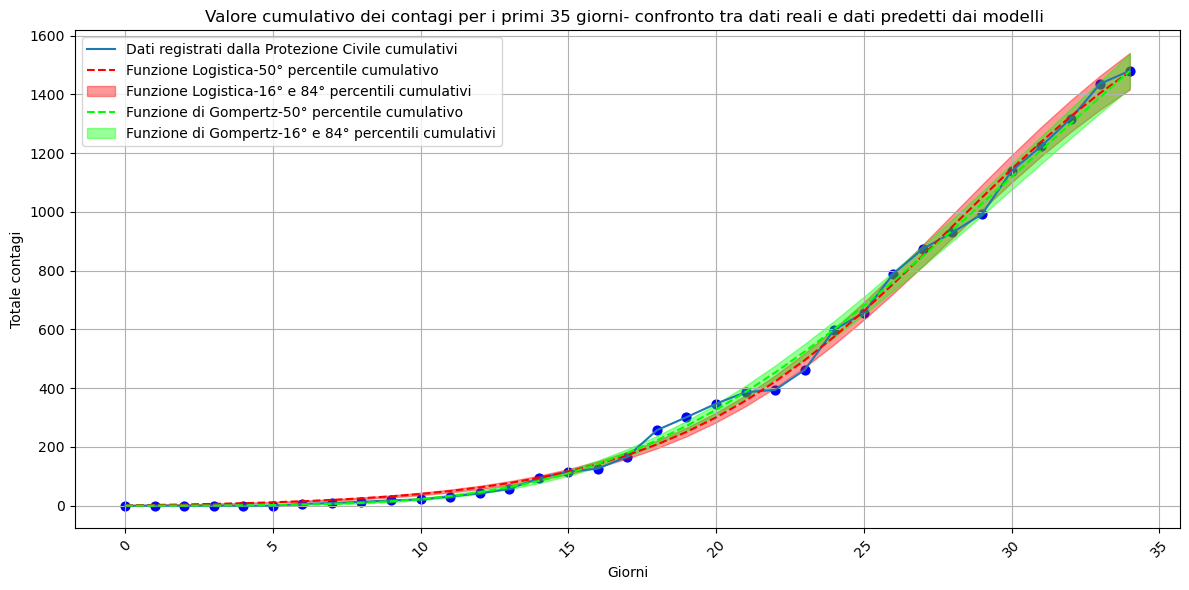

In [22]:
# Funzione cumulativa :
#Dato che i nuovi contagi sono registrati giorno per giorno, per calcolare la funzione cumulativa posso sfruttare il comando di NumPy: np.cumsum()
# dati registrati dalla Protezione Civile:
cumulativa_registrati = np.cumsum(y_val)

# Funzione Logistica : 
cumulativa_log = np.cumsum(med_1s_log)
cumulativa_low_log = np.cumsum(low_1s_log)
cumulativa_high_log = np.cumsum(high_1s_log)

# Funzione di Gompertz : 
cumulativa_gomp = np.cumsum(med_1s_gomp)
cumulativa_low_gomp = np.cumsum(low_1s_gomp)
cumulativa_high_gomp = np.cumsum(high_1s_gomp)

# Grafico : 
plt.figure(figsize=(12,6))
plt.scatter(dataregione_35['Giorno'], cumulativa_registrati, color='blue', marker='o', s=40)
plt.plot(dataregione_35['Giorno'], cumulativa_registrati, label="Dati registrati dalla Protezione Civile cumulativi", linestyle='-')
plt.plot(dataregione_35['Giorno'], cumulativa_log, label="Funzione Logistica-50° percentile cumulativo", linestyle='--',color='r')
plt.fill_between(dataregione_35['Giorno'], cumulativa_low_log, cumulativa_high_log, label="Funzione Logistica-16° e 84° percentili cumulativi", color= 'red', alpha=0.4)
plt.plot(dataregione_35['Giorno'],cumulativa_gomp , label="Funzione di Gompertz-50° percentile cumulativo", linestyle='--', color='lime')
plt.fill_between(dataregione_35['Giorno'],cumulativa_low_gomp ,cumulativa_high_gomp , label="Funzione di Gompertz-16° e 84° percentili cumulativi", color='lime', alpha=0.4)
plt.xlabel("Giorni")
plt.ylabel("Totale contagi")
plt.title("Valore cumulativo dei contagi per i primi 35 giorni- confronto tra dati reali e dati predetti dai modelli ")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Propagazione dell'incertezza teorica per i modelli (100 giorni) :

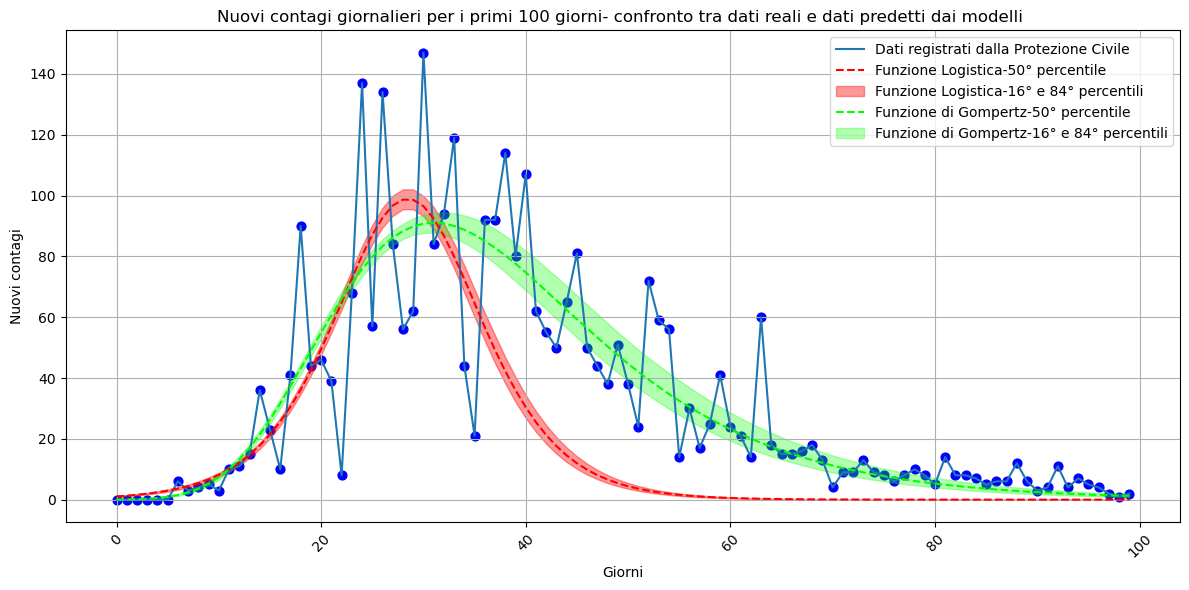

In [23]:
# Versione 100 giorni : 
# valori previsti per i primi 100 giorni : 
prediction_log = previsione_mod_log(flat_samples_log, range(100))
prediction_gomp = previsione_mod_gomp(flat_samples_gomp, range(100))

# calcolo i percentili (16,50,84) :
low_1s_log, med_1s_log, high_1s_log = np.percentile(prediction_log,[16,50,84], axis=0)
low_1s_gomp, med_1s_gomp, high_1s_gomp = np.percentile (prediction_gomp, [16,50,84], axis=0)

# grafico per 100 giorni : 
plt.figure(figsize=(12,6))
plt.scatter(dataregione_100['Giorno'], y_val_100, color='blue', marker='o', s=40)
plt.plot(dataregione_100['Giorno'], y_val_100, label="Dati registrati dalla Protezione Civile", linestyle='-')
plt.plot(dataregione_100['Giorno'], med_1s_log, label="Funzione Logistica-50° percentile", linestyle='--',color='r')
plt.fill_between(dataregione_100['Giorno'], low_1s_log, high_1s_log, label="Funzione Logistica-16° e 84° percentili", color= 'red', alpha=0.4)
plt.plot(dataregione_100['Giorno'], med_1s_gomp, label="Funzione di Gompertz-50° percentile", linestyle='--', color='lime')
plt.fill_between(dataregione_100['Giorno'], low_1s_gomp, high_1s_gomp, label="Funzione di Gompertz-16° e 84° percentili", color='lime', alpha=0.3)
plt.xlabel("Giorni")
plt.ylabel("Nuovi contagi")
plt.title("Nuovi contagi giornalieri per i primi 100 giorni- confronto tra dati reali e dati predetti dai modelli ")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Andamento cumulativo dei nuovi contagi registrati nei primi 100 giorni :

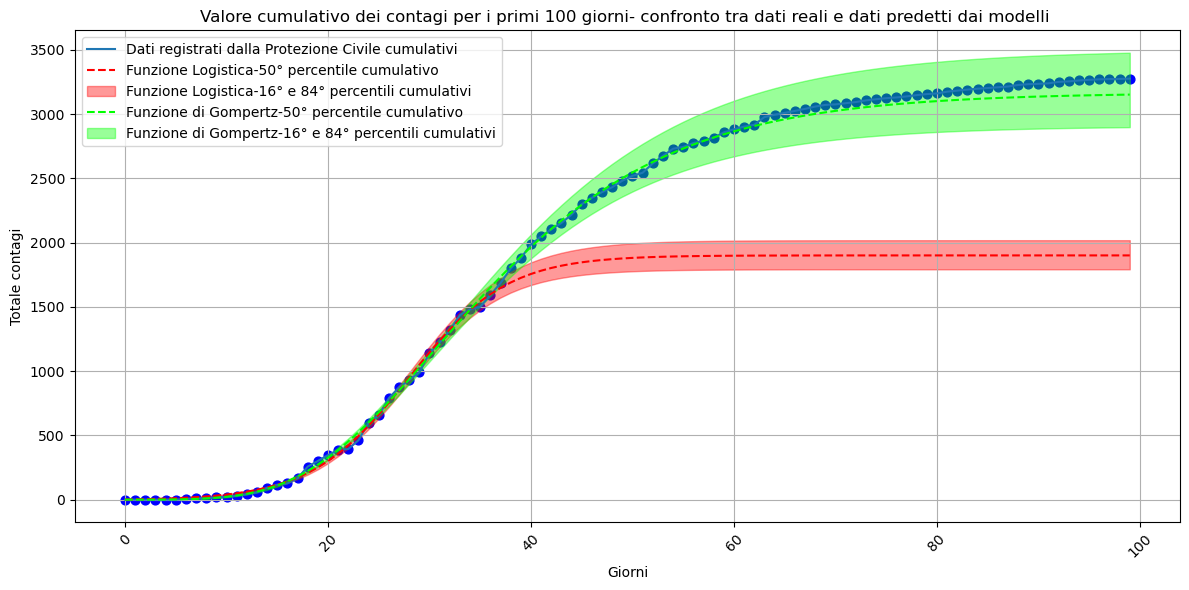

In [24]:
# Funzione cumulativa :
#Dato che i nuovi contagi sono registrati giorno per giorno, per calcolare la funzione cumulativa posso sfruttare il comando di NumPy: np.cumsum()
# dati registrati dalla Protezione Civile:
cumulativa_registrati = np.cumsum(y_val_100)

# Funzione Logistica : 
cumulativa_log = np.cumsum(med_1s_log)
cumulativa_low_log = np.cumsum(low_1s_log)
cumulativa_high_log = np.cumsum(high_1s_log)

# Funzione di Gompertz : 
cumulativa_gomp = np.cumsum(med_1s_gomp)
cumulativa_low_gomp = np.cumsum(low_1s_gomp)
cumulativa_high_gomp = np.cumsum(high_1s_gomp)

# Grafico : 
plt.figure(figsize=(12,6))
plt.scatter(dataregione_100['Giorno'], cumulativa_registrati, color='blue', marker='o', s=40)
plt.plot(dataregione_100['Giorno'], cumulativa_registrati, label="Dati registrati dalla Protezione Civile cumulativi", linestyle='-')
plt.plot(dataregione_100['Giorno'], cumulativa_log, label="Funzione Logistica-50° percentile cumulativo", linestyle='--',color='r')
plt.fill_between(dataregione_100['Giorno'], cumulativa_low_log, cumulativa_high_log, label="Funzione Logistica-16° e 84° percentili cumulativi", color= 'red', alpha=0.4)
plt.plot(dataregione_100['Giorno'],cumulativa_gomp , label="Funzione di Gompertz-50° percentile cumulativo", linestyle='--', color='lime')
plt.fill_between(dataregione_100['Giorno'],cumulativa_low_gomp ,cumulativa_high_gomp , label="Funzione di Gompertz-16° e 84° percentili cumulativi", color='lime', alpha=0.4)
plt.xlabel("Giorni")
plt.ylabel("Totale contagi")
plt.title("Valore cumulativo dei contagi per i primi 100 giorni- confronto tra dati reali e dati predetti dai modelli ")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Osservazioni : 
Analizzando i grafici soprastanti si possono trarre le seguenti conclusioni : 
* i dati registrati dalla Protezione Civile durante i primi giorni del contagio sono ben descritti da entrambi i modelli,  funzione Logistica e di Gompertz (è evidente in tutti e quattro i grafici realizzati). In particolar modo, questo accordo è ben evidenziato dal grafico con le curve cumulative per i dati associati ai primi 35 giorni della pandemia. Questo perché, nei primi giorni del contagio, la crescita dei nuovi casi segue un andamento quasi esponenziale che, appunto, è ben descritto da entrambi i modelli.
* questo trend svanisce nel momento in cui si passa a confrontare e analizzare i dati su un arco temporale più lungo, come nel caso dei primi 100 giorni di pandemia. Infatti, sia il grafico che mostra l'andamento giornaliero dei nuovi contagi, che quello con le curve cumulative mostrano chiaramente come la funzione di Gompertz descriva bene i dati realmente registrati, mentre la funzione logistica produce valori sottostimati (le due curve cumulative tendono a divergere sempre più tra loro, via via che ci si avvicina al centesimo giorno). Questo comportamento è legato alla struttura delle due funzioni considerate : la funzione logistica è una funzione che che cresce fino al punto di flesso, ma superato tale valore la crescita inizia a rallentare troppo velocemente rispetto a quanto fanno i dati reali. Questo spiega perché tale modello produca risultati con valori sottostimati, rispetto a quelli registrati. La funzione di Gompertz ha, comunque, un punto di flesso, solo che l'andamento della funzione dopo tale punto rimane più alto rispetto a quello della funzione Logistica, quindi, dato che la crescita rallenta più lentamente, tale modello genera risultati maggiormente in accordo con i dati registrati.

In conclusione, quando si vanno a considerare scale temporali più lunghe, i dati realmente registrati sono descritti meglio dalla funzione di Gompertz, piuttosto che dalla funzione Logistica, che, invece, produce valori sottostimati.



## Parte 4 - Modellizzazione dell'Intervallo 3 Giugno 2020 - 3 Giugno 2021

Riporto la consegna per questa parte di esercizio : 
1. Considerare l'intervallo temporale tra il 3 giugno 2020 e il 3 giugno 2021.
2. Alla luce di quanto verificato precedentemente, come modellereste l’andamento 
epidemiologico in questo periodo? 

In [25]:
# vado a selezionare l'intervallo di tempo scelto : 
dataregione.index = pd.to_datetime(dataregione.index) 

# definisco e seleziono la data di inizio :
data_inizio = pd.to_datetime("2020-06-03")
#definisco e seleziono la data finale : 
data_fine = data_inizio + pd.Timedelta(days=365)

#vado a leggere i dati dei nuovi contagi in questo intervallo temporale, concentrandomi sempre su quelli registrati per la regione FVG:
dataregione_annuali = dataregione.loc[data_inizio:data_fine].copy()  
dataregione_annuali['Giorno'] = (dataregione_annuali.index - data_inizio).days

#converto in array numPy. Questi sono i dati estratti dal file dati 
t_val_annuali=dataregione_annuali['Giorno'].values
y_val_annuali = dataregione_annuali['nuovi_positivi'].astype(float).values 

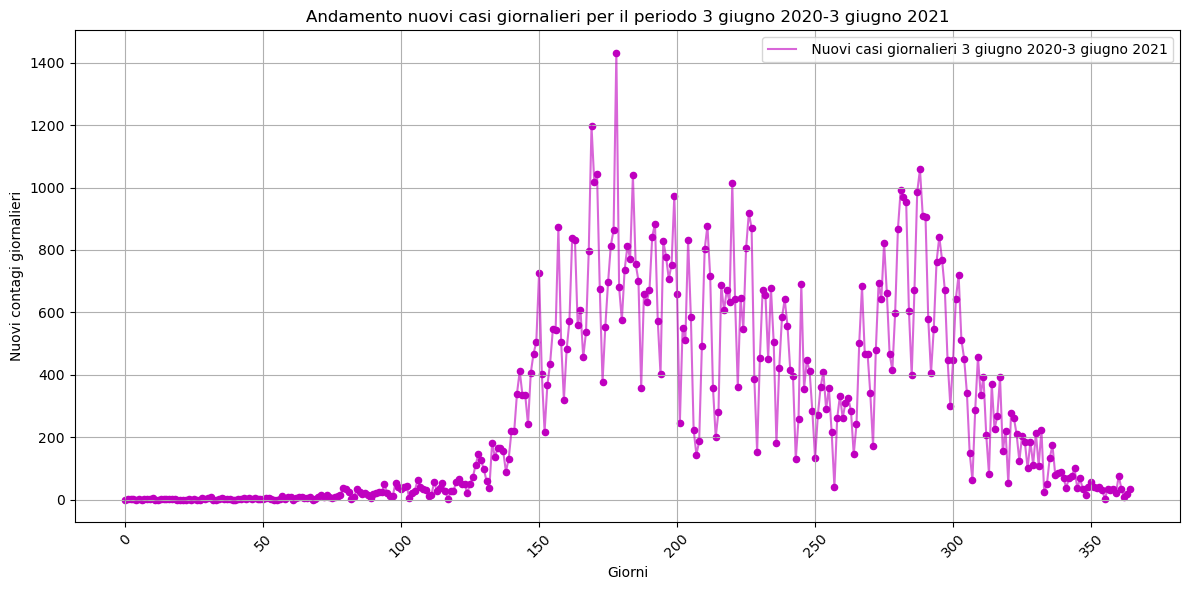

In [26]:
# grafico con andamento dei contagi in questo arco temporale : 
plt.figure(figsize=(12,6))
plt.scatter(dataregione_annuali['Giorno'], y_val_annuali , color='m', marker='o', s=20)
plt.plot(dataregione_annuali['Giorno'], y_val_annuali, label=" Nuovi casi giornalieri 3 giugno 2020-3 giugno 2021", linestyle='-',color='m',alpha=0.6)
plt.title("Andamento nuovi casi giornalieri per il periodo 3 giugno 2020-3 giugno 2021")
plt.xlabel("Giorni")
plt.ylabel("Nuovi contagi giornalieri")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Il grafico mostra la presenza di due picchi durante l'arco di tempo considerato. Conseguentemente, i dati non possono essere analizzati sfruttando semplicemente la funzione Logistica o quella di Gompertz, in quanto questi modelli sono validi solo quando è presente un unico picco, perché sono funzioni caratterizzate da un unico punto di flesso e da una dinamica di crescita unica. Una possibile soluzione, che è proprio quella che ho deciso di adottare per poter modellare questi dati, consiste nel considerare la somma di più curve Logistiche o di Gompertz. In questo caso, dato che ho due picchi vado a sommare due curve per ogni modello considerato .  

Per vedere concretamente quanto sia valida questa soluzione si possono fare due fit. Per realizzare i due fit (uno per modello) sfrutto il metodo dei minimi quadrati: 
$$
\sigma=\sum_{i}^{n} (y_i-y_{i,mod})^2
$$
dove gli $y_i$ corrispondono ai dati registrati, mentre gli $y_{i,mod}$ sono i valori previsti dai modelli. 

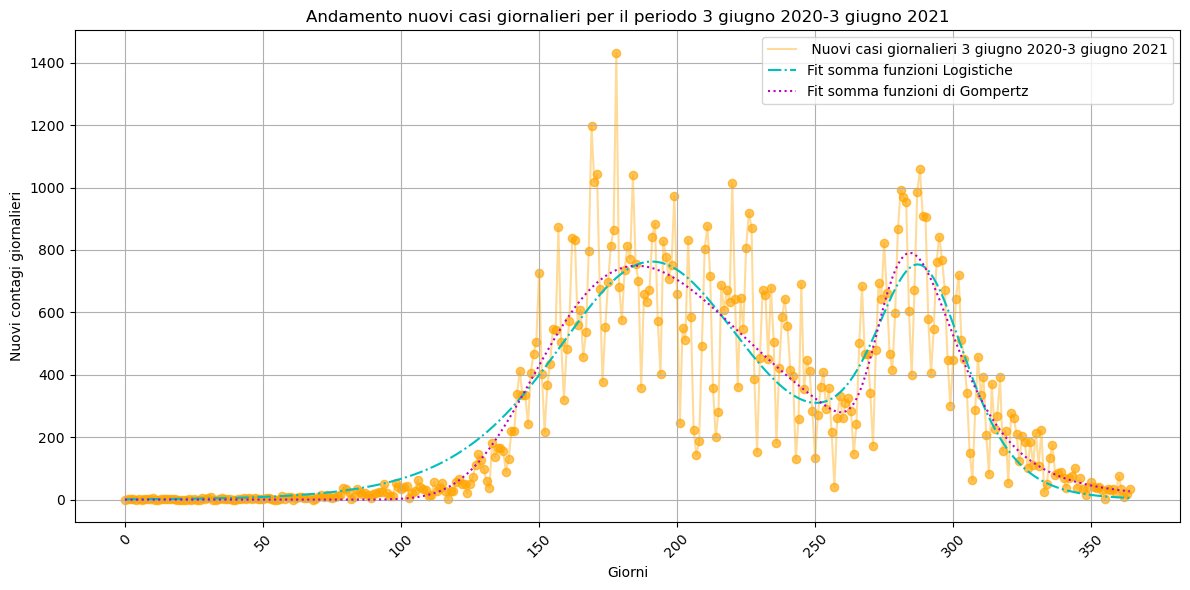

In [27]:
# sommo due funzioni logistiche 
def logistica_somma(t, N_1, k_1, t_01, N_2, k_2, t_02):
    return  contagi_giornalieri_log(t, N_1, k_1, t_01)+ contagi_giornalieri_log(t, N_2, k_2, t_02)

#sommo due funzioni di gompertz_2,k_2,t_02):
def gompertz_somma(t, N_1, k_1, t_01, N_2, k_2, t_02):
    return contagi_giornalieri_gomp(t, N_1, k_1, t_01)+contagi_giornalieri_gomp(t, N_2, k_2, t_02)

def errore_logistica(param,t,y):
    N_1,k_1,t_01,N_2,k_2,t_02 = param
    simul= logistica_somma(t_val_annuali,*param)
    return np.sum((y-simul)**2)

def errore_gompertz(param,t,y):
    N_1,k_1,t_01,N_2,k_2,t_02 = param
    simul= gompertz_somma(t_val_annuali,*param)
    return np.sum((y-simul)**2)

# scelgo i valori iniziali dei parametri: 
log_p0=[11000,0.20,160,12000,0.15,270]
gomp_p0=[18000,0.1,50,13000,0.08,200] 

# minimizzazione : 
min_log = minimize(errore_logistica, log_p0, args = (t_val_annuali, y_val_annuali))
min_gomp = minimize(errore_gompertz, gomp_p0, args = (t_val_annuali, y_val_annuali))

# vado a prendere la miglior soluzione trovata : 
best_min_log = min_log.x
best_min_gomp = min_gomp.x

valori_fit_log = np.array([logistica_somma(i, *best_min_log) for i in t_val_annuali]) 
valori_fit_gomp = np.array([gompertz_somma(i, *best_min_gomp) for i in t_val_annuali])
#  * davanti a best_min_log/gomp permette di prendere tutti gli argomenti presenti in best_min_log/gomp e di leggerli separatamente  

# grafico dei dati registrati a confronto con i fit : 
plt.figure(figsize=(12,6))
plt.scatter(dataregione_annuali['Giorno'], y_val_annuali , color='orange', marker='o', s=35, alpha=0.65)
plt.plot(dataregione_annuali['Giorno'], y_val_annuali, label=" Nuovi casi giornalieri 3 giugno 2020-3 giugno 2021", linestyle='-', alpha=0.40, color='orange')
plt.plot(dataregione_annuali['Giorno'], valori_fit_log, label="Fit somma funzioni Logistiche" , color='c', linestyle='-.')
plt.plot(dataregione_annuali['Giorno'], valori_fit_gomp, label="Fit somma funzioni di Gompertz" , color='m', linestyle=':')
plt.title("Andamento nuovi casi giornalieri per il periodo 3 giugno 2020-3 giugno 2021")
plt.xlabel("Giorni")
plt.ylabel("Nuovi contagi giornalieri")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

    

# Osservazioni : 
Si può notare come i due fit riescano a riprodurre sufficientemente bene i dati registrati dalla Protezione Civile per l'intervallo di tempo considerato. In particolar modo, la curva associata alla funzione di Gompertz riesce a ricreare meglio l'andamento di tali dati. I parametri iniziali sono stati scelti in modo arbitrario andando a eseguire una serie di prove per vedere con quali valori si riusciva a ottenere un maggior accordo tra le curve. 

# Appendice 

Si può ripetere l'analisi dati svolta nel punto precedente anche con questo set di dati (per il periodo 03/06/2020-03/06/2021). In particolare, siccome dai fit riportati sopra emerge che la funzione di Gompertz è quella che riesce a riprodurre meglio l'andamento dei dati reali, ho deciso di considerare solo questo modello. 

In [28]:
#sommo due funzioni di Gompertz):
def gompertz_somma(t, N_1, k_1, t_01, N_2, k_2, t_02):
    return contagi_giornalieri_gomp(t, N_1, k_1, t_01)+contagi_giornalieri_gomp(t, N_2, k_2, t_02)

gomp_p0=[18000,0.1,50,13000,0.08,200] 

# definisco il prior:
def log_prior_somma(theta) : 
     N_1,k_1,t_01,N_2,k_2,t_02 = theta    
     if (0<k_1<5 and -50<t_01<400 and 0<N_1<1e6 
     and 0<k_2<5 and -50<t_02<400 and 0<N_2<1e6) :  # limito k_1 e k_2 tra valori finiti per evitare di ottenere overflow nell'exp e quindi NaN
        return 0.0
     return -np.inf

# definisco il logaritmo della Likelihood per la funzione di Gompertz somma : 
def log_likelihood_gomp_somma(theta,t_val_annuali,y_val_annuali):
    N_1,k_1,t_01,N_2,k_2,t_02 = theta
    lamb_t_gomp= [gompertz_somma(t,N_1,k_1,t_01,N_2,k_2,t_02) for t in t_val_annuali] 
    lamb_t_gomp=np.maximum(lamb_t_gomp,1e-3) # dato che log(0)= -inf, voglio evitare che questo succeda, altrimenti si blocca l'algoritmo  
    return np.sum(y_val_annuali * np.log(lamb_t_gomp) - lamb_t_gomp)  # logaritmo della likelihood poissoniana 

#definisco la posterior per la funzione di Gompertz 
def log_posterior_gomp_somma(theta,t_val_annuali,y_val_annuali):
    lp=log_prior_somma(theta)
    if not np.isfinite(lp):
         return -np.inf
    return lp + log_likelihood_gomp_somma(theta, t_val_annuali,y_val_annuali)

#converto in array numPy. Questi sono i dati estratti dal file dati 
t_val_annuali=dataregione_annuali['Giorno'].values
y_val_annuali = dataregione_annuali['nuovi_positivi'].astype(float).values 



In [29]:
np.random.seed(42)
nll_gomp_somma = lambda *args: -log_posterior_gomp_somma(*args)
initial_gomp_somma = gomp_p0
soln_gomp_somma = minimize(nll_gomp_somma,initial_gomp_somma, args=(t_val_annuali,y_val_annuali))

N_1_bf, k_1_bf, t_01_bf, N_2_bf, k_2_bf, t_02_bf = soln_gomp_somma.x
print("Migliore valore dei parametri : ", soln_gomp_somma.x )

C:\Users\veron\anaconda3\envs\laboratorioTdr\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\veron\anaconda3\envs\laboratorioTdr\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\veron\anaconda3\envs\laboratorioTdr\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
C:\Users\veron\anaconda3\envs\laboratorioTdr\Lib\site-packages\scipy\optimize\_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


Migliore valore dei parametri :  [8.67272493e+04 2.08868490e-02 7.28173718e+01 1.92249349e+04
 8.40309302e-02 2.58450877e+02]


In [30]:
pos_gomp_somma = soln_gomp_somma.x *(1+ 1e-4 * np.random.randn(32, 6))
nwalkers, ndim = pos_gomp_somma.shape

sampler_gomp_somma = emcee.EnsembleSampler(nwalkers, ndim, log_posterior_gomp_somma, args=(t_val_annuali , y_val_annuali))
sampler_gomp_somma.run_mcmc(pos_gomp_somma, 10000, progress=True )
samples_gomp_somma = sampler_gomp_somma.get_chain(discard=3000)


100%|██████████| 10000/10000 [1:17:05<00:00,  2.16it/s] 


In [31]:
print(samples_gomp_somma.shape)


(7000, 32, 6)


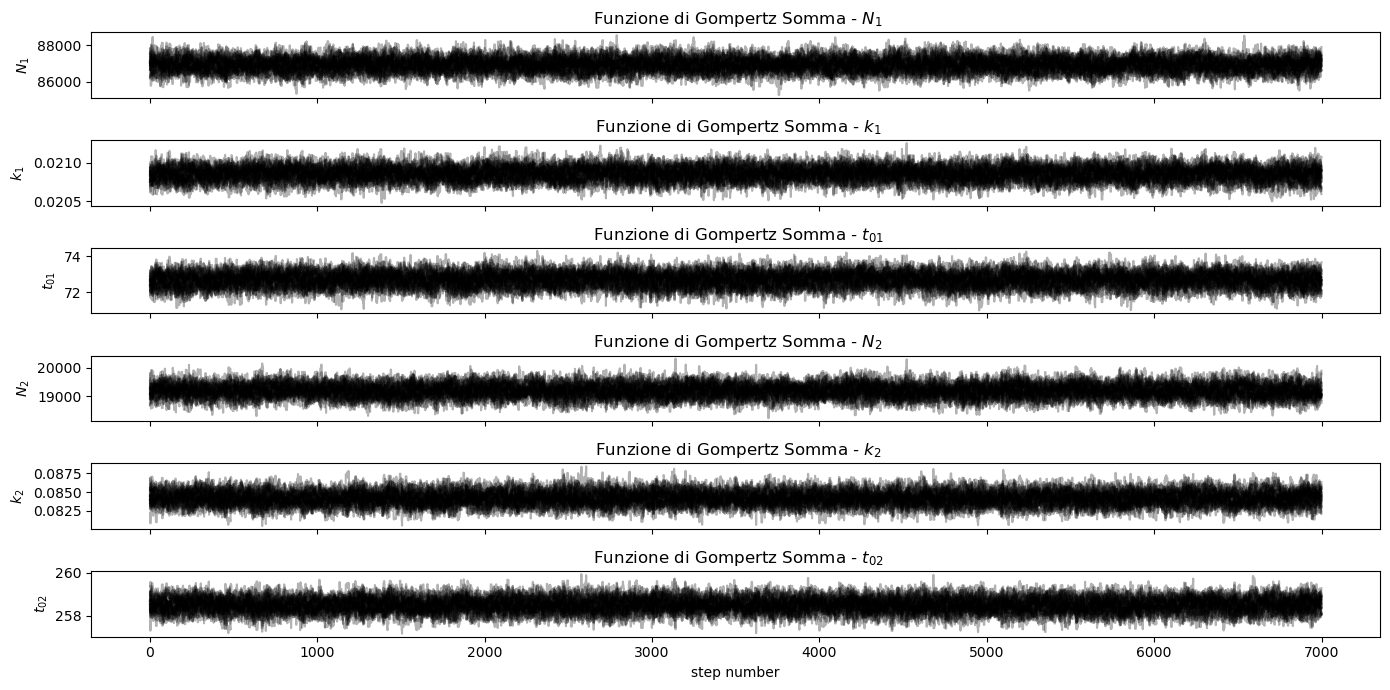

In [32]:
fig, axes = plt.subplots(6,1, figsize=(14, 7), sharex=True) #sharex: indica che i due grafici condividono asse x
labels = ["$N_1$", "$k_1$", "$t_{01}$","$N_2$", "$k_2$", "$t_{02}$"]
for i in range(ndim):
    axes[i].plot(samples_gomp_somma[:, :, i], 'k', alpha=0.3)
    axes[i].set_ylabel(labels[i])
    axes[i].set_title(f' Funzione di Gompertz Somma - {labels[i]}')
    

axes[-1].set_xlabel("step number");
plt.tight_layout()
plt.show()

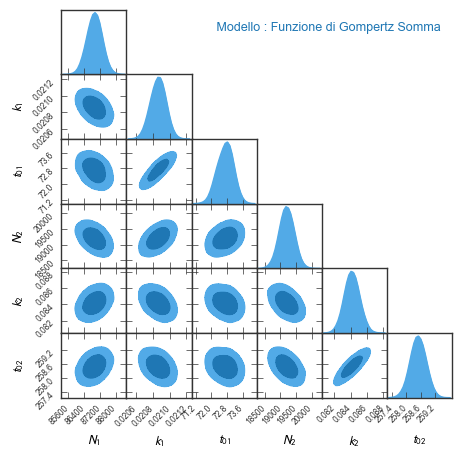

In [33]:
flat_samples_gomp_somma = sampler_gomp_somma.get_chain(discard=3000, flat=True)
# corner plot per funzione di Gompers : 
GTC = pygtc.plotGTC(chains=flat_samples_gomp_somma,          
                    paramNames=['$N_1$','$k_1$','$t_{01}$','$N_2$','$k_2$','$t_{02}$'],
                    chainLabels=[' Modello : Funzione di Gompertz Somma'],
                    figureSize='MNRAS_page')
plt.show()

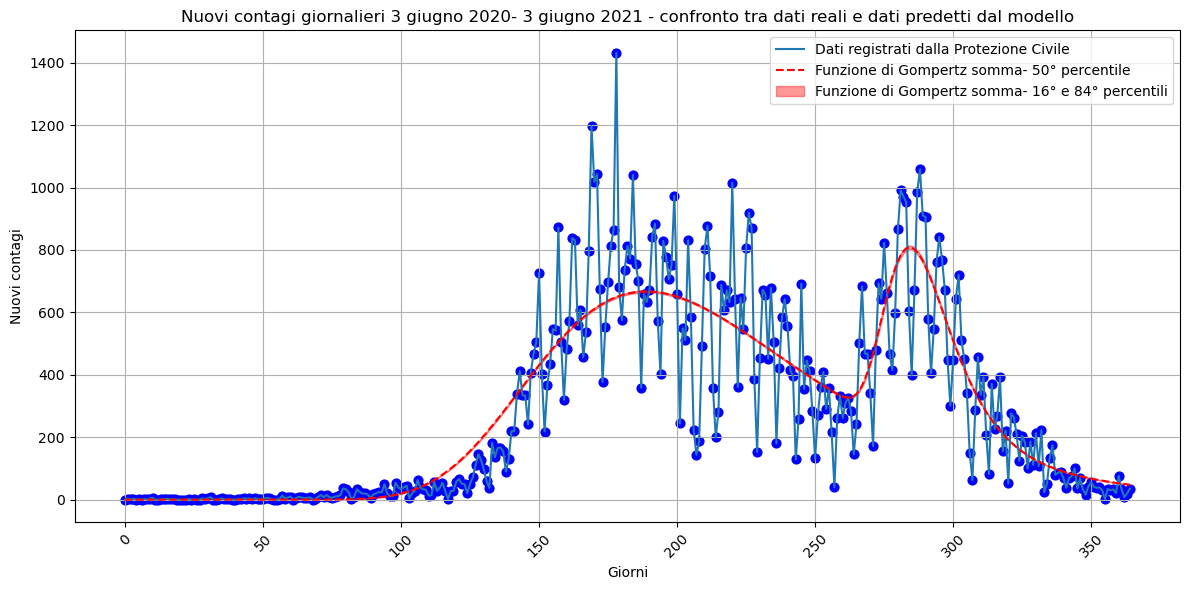

In [34]:
# Propagazione dell'incertezza teorica per il modello :
def previsione_gomp_somma(samples,giorni):
    prediction=[]
    for theta in samples[::60]:
        N_1,k_1,t_01,N_2,k_2,t_02 = theta
        y_pred=[gompertz_somma(t,N_1,k_1,t_01,N_2,k_2,t_02) for t in giorni]
        prediction.append(y_pred)
    return np.array(prediction)

prediction_gomp_somma = previsione_gomp_somma(flat_samples_gomp_somma, range(365))

# calcolo i percentili :
low_gomp_somma, med_gomp_somma, high_gomp_somma = np.percentile(prediction_gomp_somma,[16,50,84], axis=0)

#grafico per nuovi contagi giornalieri : 
plt.figure(figsize=(12,6))
plt.scatter(dataregione_annuali['Giorno'], y_val_annuali,color= 'blue', marker='o', s=40)
plt.plot(dataregione_annuali['Giorno'], y_val_annuali, label="Dati registrati dalla Protezione Civile", linestyle='-')
plt.plot(dataregione_annuali['Giorno'], med_gomp_somma, label="Funzione di Gompertz somma- 50° percentile", linestyle='--', color ='r')
plt.fill_between(dataregione_annuali['Giorno'], low_gomp_somma, high_gomp_somma, label="Funzione di Gompertz somma- 16° e 84° percentili", color='red', alpha=0.4)
plt.xlabel("Giorni")
plt.ylabel("Nuovi contagi")
plt.title("Nuovi contagi giornalieri 3 giugno 2020- 3 giugno 2021 - confronto tra dati reali e dati predetti dal modello")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

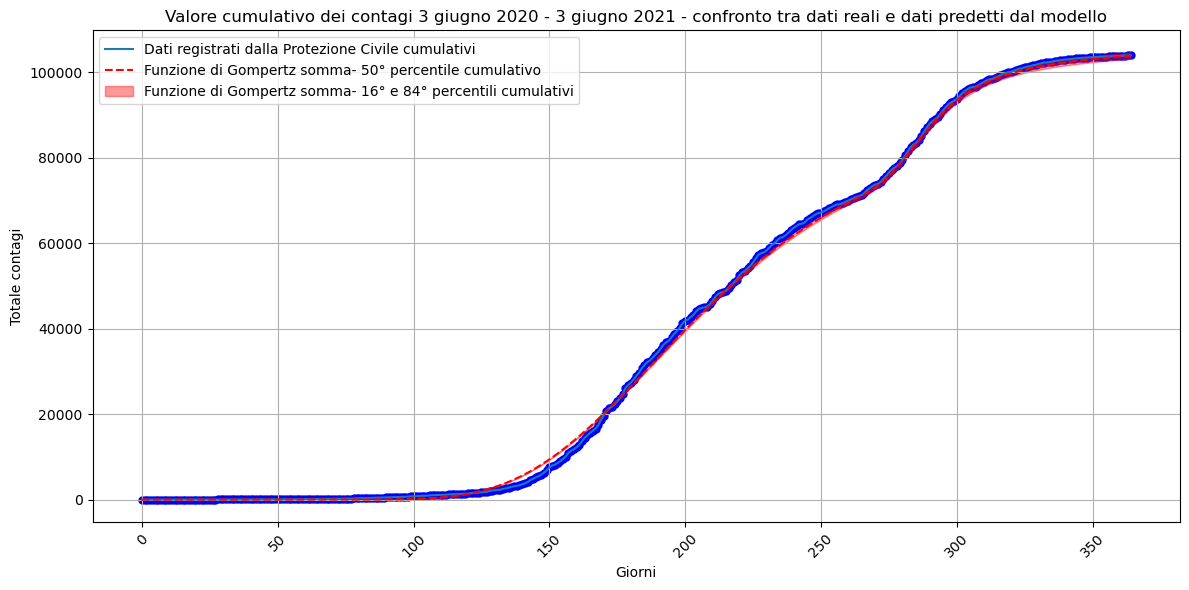

In [35]:
# Funzione cumulativa : 
# dati reali :
cumulativa_registrati= np.cumsum(y_val_annuali)

# Funzione di Gompertz somma : 
cumulativa_gomp_somma = np.cumsum(med_gomp_somma)
cumulativa_low_gomp_somma = np.cumsum(low_gomp_somma)
cumulativa_high_gomp_somma = np.cumsum(high_gomp_somma)

# grafico :
plt.figure(figsize=(12,6))
plt.scatter(dataregione_annuali['Giorno'], cumulativa_registrati, color= 'blue', marker='o', s=25)
plt.plot(dataregione_annuali['Giorno'], cumulativa_registrati, label="Dati registrati dalla Protezione Civile cumulativi", linestyle='-')
plt.plot(dataregione_annuali['Giorno'], cumulativa_gomp_somma, label="Funzione di Gompertz somma- 50° percentile cumulativo", linestyle='--', color ='r')
plt.fill_between(dataregione_annuali['Giorno'], cumulativa_low_gomp_somma, cumulativa_high_gomp_somma, label="Funzione di Gompertz somma- 16° e 84° percentili cumulativi", color='red', alpha=0.4)
plt.xlabel("Giorni")
plt.ylabel("Totale contagi")
plt.title("Valore cumulativo dei contagi 3 giugno 2020 - 3 giugno 2021 - confronto tra dati reali e dati predetti dal modello")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusioni : 


Dall’analisi dei dati dei nuovi contagi giornalieri registrati dalla Protezione Civile per la regione Friuli-Venezia Giulia, durante la pandemia di Covid-19, e confrontandoli con i risultati ottenuti dai modelli epidemiologici considerati, emergono alcune osservazioni significative:
* La funzione Logistica riesce a descrivere in modo soddisfacente i dati registrati nei primi giorni di epidemia, ma tende a sottostimare i valori quando si considerano intervalli temporali più lunghi.
* La funzione di Gompertz, al contrario, riproduce in maniera più accurata l’andamento reale dei contagi negli intervalli temporali successivi. Questo risultato è stato ottenuto sia dall'analisi dei dati registrati nei primi 100 giorni di pandemia, che da quella dei dati raccolti tra il 3 giugno 2020 e il 3 giugno 2021.
* La differenza tra i due modelli è legata alla forma delle due curve : la funzione Logistica presenta una crescita simmetrica e raggiunge il suo plateau più rapidamente, mentre la curva di Gompertz è asimmetrica e perciò, si adatta meglio alla fase dell'epidemia in cui la crescita dei contagi rallenta progressivamente.